In [1]:
# https://medium.com/datadriveninvestor/deep-autoencoder-using-keras-b77cd3e8be95

In [2]:
#from __future__ import absolute_import
from keras.datasets import mnist

from keras.models import Sequential
from keras.layers import Input, Dense, Activation
from keras.models import Model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [3]:
# Using TensorFlow backend.

In [33]:
#making sure GPU is in use 

In [34]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7500021514511338301
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11285289370
locality {
  bus_id: 1
  links {
  }
}
incarnation: 3466055495640697454
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
]


In [35]:
# Loading the MNIST dataset images and not their labels. 
# We want to reconstruct the images as output of the autoencoder, so no need labels

In [36]:
(X_train, _), (X_test, _) = mnist.load_data()

In [37]:
X_train.shape

(60000, 28, 28)

In [38]:
# normalizing the data for better training.

In [39]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [40]:
#reshape to single row

In [41]:
np.prod(X_train.shape[1:])

784

In [42]:
X_train = X_train.reshape(len(X_train), np.prod(X_train.shape[1:])) #Return the product of array elements over a given axis.
X_test = X_test.reshape(len(X_test), np.prod(X_test.shape[1:]))

In [43]:
X_train.shape

(60000, 784)

In [44]:
print(X_train.shape,'train')
print(X_test.shape,'validation')

(60000, 784) train
(10000, 784) validation


In [45]:
imageShape = X_train.shape[1]

In [46]:
# first encode the input image and add different encoded and decoded layer to build the deep autoencoder

In [47]:
input_img = Input(shape=(imageShape,))

In [48]:
#use relu for all non hidden layers (except for last) for non-linearity

In [49]:
# in final layer, reconstruct the input image we use sigmoid activation function.
# output layer needs to predict the probability of an output, and is either 0 or 1. so use sigmoid activation function

In [50]:
encoded = Dense(units=128, activation='relu')(input_img)
encoded = Dense(units=64, activation='relu')(encoded)
encoded = Dense(units=32, activation='relu')(encoded)
decoded = Dense(units=64, activation='relu')(encoded)
decoded = Dense(units=128, activation='relu')(decoded)
decoded = Dense(units=784, activation='sigmoid')(decoded)

In [51]:
encoded


<tf.Tensor 'dense_9/Relu:0' shape=(?, 32) dtype=float32>

In [52]:
decoded

<tf.Tensor 'dense_12/Sigmoid:0' shape=(?, 784) dtype=float32>

In [53]:
# create the autoencoder with input image as the input. Output will be the final decoder layer

In [54]:
autoencoder=Model(input_img, decoded)

In [55]:
# extract the encoder which takes input image as the input and the output of encoder is the encoded image of dimension 32

In [56]:
encoder = Model(input_img, encoded)

In [57]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_9 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_10 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_11 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_12 (Dense)             (None, 784)               101136    
Total para

In [58]:
encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_9 (Dense)              (None, 32)                2080      
Total params: 110,816
Trainable params: 110,816
Non-trainable params: 0
_________________________________________________________________


In [59]:
# finalizing model

In [60]:
# compile with adam optimizer
# pixels have a value of 0 or 1, so use binary_crossentropy as the loss function
# use accuracy as the metrics used for the performance of the model

In [61]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [62]:
# train the autoencoder using the training data with 50 epochs and batch size of 256

In [69]:
history = autoencoder.fit(X_train, X_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 28us/step - loss: 0.0752 - acc: 0.8152 - val_loss: 0.0757 - val_acc: 0.8141
Epoch 2/50
60000/60000 [==============================] - 2s 28us/step - loss: 0.0752 - acc: 0.8152 - val_loss: 0.0757 - val_acc: 0.8141
Epoch 3/50
60000/60000 [==============================] - 2s 29us/step - loss: 0.0752 - acc: 0.8152 - val_loss: 0.0756 - val_acc: 0.8141
Epoch 4/50
60000/60000 [==============================] - 2s 28us/step - loss: 0.0752 - acc: 0.8152 - val_loss: 0.0755 - val_acc: 0.8141
Epoch 5/50
60000/60000 [==============================] - 2s 28us/step - loss: 0.0752 - acc: 0.8152 - val_loss: 0.0757 - val_acc: 0.8141
Epoch 6/50
60000/60000 [==============================] - 2s 28us/step - loss: 0.0752 - acc: 0.8152 - val_loss: 0.0757 - val_acc: 0.8141
Epoch 7/50
60000/60000 [==============================] - 2s 29us/step - loss: 0.0752 - acc: 0.8152 - val_loss: 0.0756 - val_acc

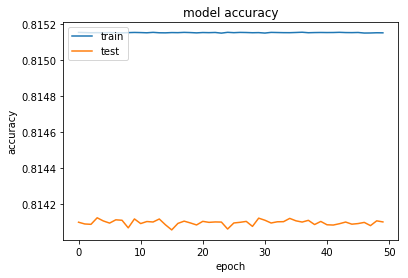

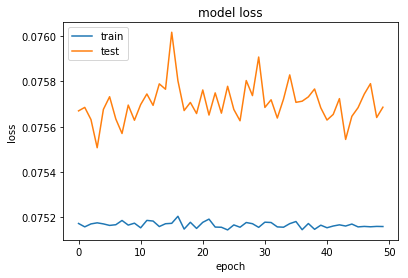

In [70]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()